# Probability & Distribution Demo 

# Probability

In [12]:
import scipy.stats
print(scipy.stats.norm(0, 1))

print(scipy.stats.norm(0, 1).pdf(0))
print(scipy.stats.norm(0, 1).cdf(0))
print(scipy.stats.norm(100, 12))
print(scipy.stats.norm(100, 12).pdf(98))
print(scipy.stats.norm(100, 12).cdf(98))
print(scipy.stats.norm(100, 12).cdf(100))

0.3989422804014327
0.5
0.032786643008494994
0.43381616738909634
0.5


## Types of Probability

In [2]:
%matplotlib inline

In [3]:
print("Hello world")
import pandas as pd

Hello world


### Conditional Probability

In [4]:
df = pd.DataFrame({'company': ['ford', 'chevy', 'ford', 'ford', 'ford', 'toyota'],
                     'model': ['mustang', 'camaro', 'fiesta', 'focus', 'taurus', 'camry'],
                     'rating': ['A', 'B', 'C', 'A', 'B', 'B'],
                     'type': ['coupe', 'coupe', 'sedan', 'sedan', 'sedan', 'sedan']})
print(df)

  company    model rating   type
0    ford  mustang      A  coupe
1   chevy   camaro      B  coupe
2    ford   fiesta      C  sedan
3    ford    focus      A  sedan
4    ford   taurus      B  sedan
5  toyota    camry      B  sedan


In [5]:
df.groupby('rating').count()['model'] / len(df)

rating
A    0.333333
B    0.500000
C    0.166667
Name: model, dtype: float64

In [6]:
(df.groupby(['rating', 'type']).count() / df.groupby('rating').count())['model']

rating  type 
A       coupe    0.500000
        sedan    0.500000
B       coupe    0.333333
        sedan    0.666667
C       sedan    1.000000
Name: model, dtype: float64

### Joint Probability

In [38]:
import numpy as np
numBins = 10  # number of bins in each dimension
data = np.random.randn(100000, 3)  # generate 100000 3-d random data points
jointProbs, edges = np.histogramdd(data, bins=numBins)
jointProbs /= jointProbs.sum()
print(jointProbs)

[[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   1.00000000e-05   2.00000000e-05
     5.00000000e-05   2.00000000e-05   0.00000000e+00   1.00000000e-05
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     1.00000000e-05   1.00000

### Entropy

In [7]:
#Joint
import numpy as np

def entropy(X):
    probs = [np.mean(X == c) for c in set(X)]
    return np.sum(-p * np.log2(p) for p in probs)

In [8]:
def entropy(X, Y):
    probs = []
    for c1 in set(X):
        for c2 in set(Y):
            probs.append(np.mean(np.logical_and(X == c1, Y == c2)))

    return np.sum(-p * np.log2(p) for p in probs)

In [9]:
def entropy(*X, **kwargs):
    predictions = parse_arg(X[0])
    H = kwargs["H"] if "H" in kwargs else 0
    v = kwargs["v"] if "v" in kwargs else np.array([True] * len(predictions))

    for c in set(predictions):
        if len(X) > 1:
            H = entropy(*X[1:], v=np.logical_and(v, predictions == c), H=H)
        else:
            p = np.mean(np.logical_and(v, predictions == c))
            H += -p * np.log2(p) if p > 0 else 0
    return H

In [42]:
%matplotlin inline

UsageError: Line magic function `%matplotlin` not found.


In [43]:
%matplotlib inline

In [10]:
print("Hello")

Hello


In [11]:
print("Hello world")

Hello world


## Probability Events

In [18]:
dice=[1,2,3,4,5,6]

n=len(dice)

for i in range(0,n):
    if((dice[i]%2==0)and(dice[i]%3)==0):
        print(dice[i])

#Union of events
dice=[1,2,3,4,5,6]

n=len(dice)

for i in range(0,n):
    if((dice[i]==4)or(dice[i]==6)):
        print(dice[i])


6
4
6


### Probability Samples

In [19]:
# Sample Space 1

cards = 52

# Outcomes
aces = 4

# Divide possible outcomes by the sample set
ace_probability = aces / cards

# Print probability rounded to two decimal places
print(round(ace_probability, 2))

0.08


In [20]:
# Sample Space 2

cards = 52

# Determine the probability of drawing a heart
hearts = 13
hearts_probability = hearts/cards

print(round(hearts_probability,2))

0.25


In [21]:
# Create function that returns probability percent rounded to one decimal place
def event_probability(event_outcomes, sample_space):
    probability = (event_outcomes / sample_space) * 100
    return round(probability, 1)

# Sample Space 3

cards = 52

# Determine the probability of drawing a heart
hearts = 13
heart_probability = event_probability(hearts, cards)

# Determine the probability of drawing a face card
face_cards = 12
face_card_probability = event_probability(face_cards, cards)

# Determine the probability of drawing the queen of hearts
ace_of_hearts = 1
ace_of_hearts_probability = event_probability(ace_of_hearts, cards)

# Print each probability
print(str(heart_probability) + '%')
print(str(face_card_probability) + '%')
print(str(ace_of_hearts_probability) + '%')

25.0%
23.1%
1.9%


In [22]:
# Sample Space 4

cards = 52
hole_cards = 2
turn_community_cards = 4
cards = cards - (hole_cards + turn_community_cards)

# Outcomes
diamonds = 13
diamonds_drawn = 4
# In poker, cards that complete a draw are known as "outs"
outs = diamonds - diamonds_drawn

#Determine river flush probability
river_flush_probability = event_probability(outs, cards)
print(river_flush_probability)

19.6


# Distribution

## Types of Distributions

### Normal Distribution

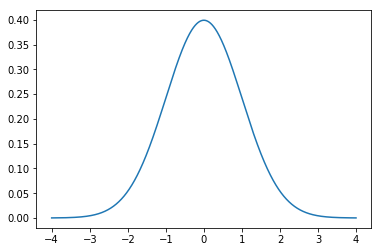

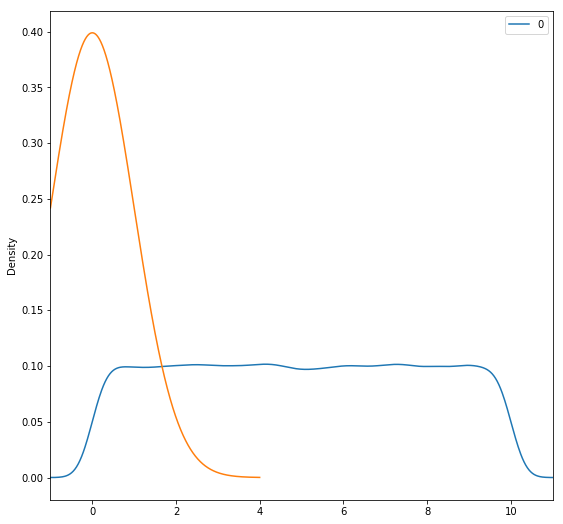

In [13]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


x= np.arange(-4,4,0.001)
plt.plot(x, norm.pdf(x))

plt.show()


#new
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats

uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0
                                 scale=10)     # To 10

pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11))

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


x= np.arange(-4,4,0.001)
plt.plot(x, norm.pdf(x))

plt.show()


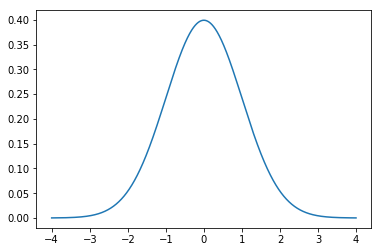

In [14]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


x= np.arange(-4,4,0.001)
plt.plot(x, norm.pdf(x))

plt.show()

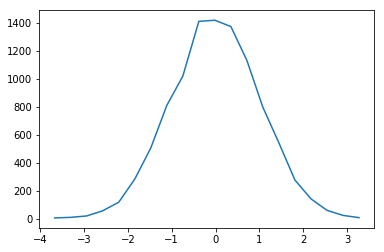

In [15]:
#Normal Distribution

import numpy as np
import matplotlib.pyplot as pl

x = np.random.randn(10000)

nbins = 20

n, bins = np.histogram(x, nbins)
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

pl.plot(pdfx, pdfy)

# Bayes Theorem

### Sample 1

In [16]:
#Bayes Theorem
def get_outcomes(sample_space, f_name='', e_name=''):
    outcomes = 0
    for e_k, e_v in sample_space.items():
        if f_name=='' or f_name==e_k:
            for se_k, se_v in e_v.items():
                if e_name!='' and se_k == e_name:
                    outcomes+=se_v
                elif e_name=='':
                    outcomes+=se_v
    return outcomes

def p(sample_space, f_name):
    return get_outcomes(sample_space, f_name) / get_outcomes(sample_space, '', '')

def p_inters(sample_space, f_name, e_name):
    return get_outcomes(sample_space, f_name, e_name) / get_outcomes(sample_space, '', '')

def p_conditional(sample_space, f_name, e_name):
    return p_inters(sample_space, f_name, e_name) / p(sample_space, f_name)

def bayes(sample_space, f, given_e):
    sum = 0;
    for e_k, e_v in sample_space.items():
        sum+=p(sample_space, e_k) * p_conditional(sample_space, e_k, given_e)
    return p(sample_space, f) * p_conditional(sample_space, f, given_e) / sum

sample_space = {'UK':{'Boy':10, 'Girl':20},
                'FR':{'Boy':10, 'Girl':10},
                'CA':{'Boy':10, 'Girl':30}}

print('Probability of being from FR:', p(sample_space, 'FR'))
print('Probability to be French Boy:', p_inters(sample_space, 'FR', 'Boy'))
print('Probability of being a Boy given a person is from FR:', p_conditional(sample_space, 'FR', 'Boy'))
print('Probability to be from France given person is Boy:', bayes(sample_space, 'FR', 'Boy'))

sample_space = {'Grow' :{'Up':160, 'Down':40},
                'Slows':{'Up':30, 'Down':70}}

print('Probability economy is growing when stock is Up:', bayes(sample_space, 'Grow', 'Up'))

Probability of being from FR: 0.2222222222222222
Probability to be French Boy: 0.1111111111111111
Probability of being a Boy given a person is from FR: 0.5
Probability to be from France given person is Boy: 0.3333333333333333
Probability economy is growing when stock is Up: 0.8421052631578948


### Sample 2

In [17]:
import numpy as np

def month_hall():

    [[selected_door,winning_door]]=np.random.random_integers(low=1,high=3,size=(1,2))
    print([[selected_door,winning_door]])


    door_options=[1,2,3]

    if selected_door==winning_door:
        door_options.remove(selected_door)
        open_door=np.random.choice(door_options)
        switching_door=door_options.remove(open_door)
        print("You have selected door ", open_door)
        print("Oops, the car was behind door ",winning_door)



    else:
        door_options.remove(selected_door)
        door_options.remove(winning_door)
        open_door=door_options

        switching_door=winning_door
        print("You have selected door ",selected_door)
        print("Oops, the car was behind door ",winning_door)




    if switching_door==winning_door:
        switch=1
        non_switch=0

    else:
        switch=0
        non_switch=1

        return(switch, non_switch)


month_hall()

[[1, 2]]
You have selected door  1
Oops, the car was behind door  2


C:\Users\VIJAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 3 + 1) instead
  """


# End of Probability Demo 